# Ecotourism Data Analysis

- Descriptive Analysis
- T-test Analysis

Data Collection was performed using Google Form survey questionnaire and saved in MS Excel spreadsheet.

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import pandas_profiling
import missingno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling

Importing all the necessary libraries/dependencies here.

In [2]:
xls = pd.ExcelFile('Ecotourism Survey Data.xlsx')
df = pd.read_excel(xls, 'Form responses 1') # sheet 1

In the above cell I have stored the excel file first and then separated the first sheet in a different dataframe.

In [3]:
df

,Timestamp,Email address,What is Your Age,Gender?,Nationality?,What according to you is ecotourism?,Have you ever gone on an ecotour?,"If Yes, what motivated you?","If No, would you like to go on an ecotour?",Have you ever travelled to Switzerland?,...,Do you think ecotourism is really environmentally friendly?,Do you mind paying higher price to travel in a more environmentally friendly manner?,According to you which tourism activities are environmentally friendly?,What do you expect from your eco-friendly travel? Tick whichever makes you think of ecotourism,Do you purposely book eco-friendly hotels/resorts for your vacations?,Which factors are important for you for you when you plan an ecotour? [Luxury],Which factors are important for you for you when you plan an ecotour? [Activities],Which factors are important for you for you when you plan an ecotour? [Environmental Impacts],Which factors are important for you for you when you plan an ecotour? [Destination],Which factors are important for you for you when you plan an ecotour? [No opinion]
0,2022-06-20 14:20:56.120,tushar.ramugade92@gmail.com,less than 30,Male,Indian,Both of the above,No,No,Yes,No,...,Yes,Yes,"Nature Walks, Camping, Hiking, Water sport act...",Safari,"Yes, Every time",10,NaN,NaN,NaN,NaN
1,2022-06-20 15:05:53.931,shettymadhavi2@gmail.com,less than 30,Female,Indian,Both of the above,Maybe,"Budget friendly,safe and scenic views",Yes,No,...,Maybe,Maybe,"Nature Walks, Camping, Water sport activities,...",Nature Trails,Can’t say,Little Important,Little Important,Little Important,Very Important,Not important
2,2022-06-20 15:14:17.561,raiswetaj@gmail.com,30,Female,Indian,Environmentally friendly travel,No,Haven't yet but whenever I go out I make it a ...,Yes,No,...,Yes,Maybe,Nature Walks,Nature Trails,Can’t say,Little Important,Little Important,Very Important,Very Important,Not important
3,2022-06-20 15:17:31.651,hindavinaik03@gmail.com,31-40,Female,Indian,Environmentally friendly travel,No,No,Maybe,No,...,Yes,Maybe,"Nature Walks, Camping",Nature Trails,Sometimes,Not important,Little Important,Very Important,Very Important,Not important
4,2022-06-20 15:32:32.639,311116@imi-luzern.com,less than 31,Female,Belarus,Environmentally friendly travel,No,-,Yes,Yes,...,Yes,Yes,Nature Walks,"Peaceful stays, Nature Trails",Sometimes,Not important,Very Important,Very Important,Very Important,Not important
5,2022-06-20 16:01:55.631,georgina.koussa@gmail.com,less than 31,Female,South African,None of the above,No,N/a,Maybe,Yes,...,No Opinion,No,"Nature Walks, Camping, Hiking","Safari, Nature Trails, Unique Destinations",Sometimes,Little Important,Very Important,Very Important,Very Important,Not important
6,2022-06-20 16:04:45.945,aliajones27@gmail.com,less than 31,Female,Tanzanian,Both of the above,Yes,My family,Yes,Yes,...,Maybe,Yes,"Nature Walks, Camping, Hiking","Safari, Nature Trails",Sometimes,Little Important,Little Important,Very Important,Very Important,Not important
7,2022-06-20 21:03:36.012,311123@imi-luzern.com,less than 31,Female,Taiwanese,Both of the above,No,I haven't gone yet,Yes,Yes,...,Maybe,Yes,"Nature Walks, Camping, Hiking","Nature Trails, Unique Destinations",Sometimes,Not important,Little Important,Little Important,Very Important,Little Important
8,2022-06-21 03:32:59.570,krithipoojary96@gmail.com,less than 31,Female,Indian,Both of the above,No,Nil,Maybe,No,...,Maybe,Maybe,"Nature Walks, Camping, Hiking, Water sport act...","Safari, Peaceful stays, Nature Trails, Unique ...",Never,Not important,Very Important,Very Important,Very Important,"Not important, Little Important"
9,2022-06-21 05:41:25.734,dakshetapoojary2797@gmail.com,less than 31,Female,Indian,Environmentally friendly travel,No,Not yet gone,Yes,No,...,Yes,No,Nature Walks,"Peaceful stays, Unique Destinations",Sometimes,Very Important,Very Important,Very Important,Little Important,Little Important


We can see that the spreadsheet named "Form responses 1" consists of 44 rows and 23 columns in it.

In [4]:
df.columns

Index(['Timestamp', 'Email address', 'What is Your Age', 'Gender?',
       'Nationality?', 'What according to you is ecotourism?',
       'Have you ever gone on an ecotour?', 'If Yes, what motivated you?',
       'If No, would you like to go on an ecotour?',
       'Have you ever travelled to Switzerland?',
       'Why will/Have you travelled to Switzerland?',
       'How environmentally friendly do you think Switzerland is as a tourist destination?',
       'What things do you consider while planning the tour? ',
       'Do you think ecotourism is really environmentally friendly?',
       'Do you mind paying higher price to travel in a more environmentally friendly manner?',
       'According to you which tourism activities are environmentally friendly?',
       'What do you expect from your eco-friendly travel? Tick whichever makes you think of ecotourism',
       'Do you purposely book eco-friendly hotels/resorts for your vacations?',
       'Which factors are important for you for 

Using `columns` instance we can see all the 23 column names from the "Form responses 1" sheet.

In [5]:
df.drop(["Timestamp", "Email address"], axis=1, inplace=True)

I have dropped the columns that do not deem useful in our analysis phase.

In [6]:
df.rename(columns = {'What is Your Age':"Age",
                     'Gender?':"Gender",
                     'Nationality?':"Nationality",
                     'What according to you is ecotourism?':"Define Ecotourism",
                     'Have you ever gone on an ecotour?':"Been on an Ecotour",
                     'If Yes, what motivated you?':"Motivation for Ecotour",
                     'If No, would you like to go on an ecotour?':"Interested in Ecotour",
                     'Have you ever travelled to Switzerland?':"Travelled to Switzerland",
                     'Why will/Have you travelled to Switzerland?':"Reason for travel to Switzerland",
                     'How environmentally friendly do you think Switzerland is as a tourist destination?':"Rate Switzerland on being environment friendly",
                     'What things do you consider while planning the tour? ':"Things you consider planning a tour",
                     'Do you think ecotourism is really environmentally friendly?':"Is Ecotourism environment friendly",
                     'Do you mind paying higher price to travel in a more environmentally friendly manner?':"Agreement on higher charge for envirnment friendly travel",
                     'According to you which tourism activities are environmentally friendly?':"Environment friendly tourism activities",
                     'What do you expect from your eco-friendly travel? Tick whichever makes you think of ecotourism':"Expectations from Eco friendly travel",
                     'Do you purposely book eco-friendly hotels/resorts for your vacations?':"Do you book Eco friendly places on a travel",
                     'Which factors are important for you for you when you plan an ecotour? [Luxury]':"Importance of Luxury for Ecotour",
                     'Which factors are important for you for you when you plan an ecotour? [Activities]':"Importance of Activities for Ecotour",
                     'Which factors are important for you for you when you plan an ecotour? [Environmental Impacts]':"Importance of Environmental Impacts for Ecotour",
                     'Which factors are important for you for you when you plan an ecotour? [Destination]':"Importance of Destination for Ecotour",
                     'Which factors are important for you for you when you plan an ecotour? [No opinion]':"Lack of opinion during an Ecotour"
                    }, inplace = True)

With the help of `rename` I was able to change the names of columns that were too lengthy and could have been accomodated in shorter formats. I wanted to remove the ill formated column names and replace them with meaningful names that I can understand further.

In [7]:
df

,Age,Gender,Nationality,Define Ecotourism,Been on an Ecotour,Motivation for Ecotour,Interested in Ecotour,Travelled to Switzerland,Reason for travel to Switzerland,Rate Switzerland on being environment friendly,...,Is Ecotourism environment friendly,Agreement on higher charge for envirnment friendly travel,Environment friendly tourism activities,Expectations from Eco friendly travel,Do you book Eco friendly places on a travel,Importance of Luxury for Ecotour,Importance of Activities for Ecotour,Importance of Environmental Impacts for Ecotour,Importance of Destination for Ecotour,Lack of opinion during an Ecotour
0,less than 30,Male,Indian,Both of the above,No,No,Yes,No,"Leisure, Hiking/trekking, Winter Sports",10,...,Yes,Yes,"Nature Walks, Camping, Hiking, Water sport act...",Safari,"Yes, Every time",10,NaN,NaN,NaN,NaN
1,less than 30,Female,Indian,Both of the above,Maybe,"Budget friendly,safe and scenic views",Yes,No,"Leisure, other (please specify)",8,...,Maybe,Maybe,"Nature Walks, Camping, Water sport activities,...",Nature Trails,Can’t say,Little Important,Little Important,Little Important,Very Important,Not important
2,30,Female,Indian,Environmentally friendly travel,No,Haven't yet but whenever I go out I make it a ...,Yes,No,Leisure,5,...,Yes,Maybe,Nature Walks,Nature Trails,Can’t say,Little Important,Little Important,Very Important,Very Important,Not important
3,31-40,Female,Indian,Environmentally friendly travel,No,No,Maybe,No,Leisure,9,...,Yes,Maybe,"Nature Walks, Camping",Nature Trails,Sometimes,Not important,Little Important,Very Important,Very Important,Not important
4,less than 31,Female,Belarus,Environmentally friendly travel,No,-,Yes,Yes,Leisure,7,...,Yes,Yes,Nature Walks,"Peaceful stays, Nature Trails",Sometimes,Not important,Very Important,Very Important,Very Important,Not important
5,less than 31,Female,South African,None of the above,No,N/a,Maybe,Yes,other (please specify),8,...,No Opinion,No,"Nature Walks, Camping, Hiking","Safari, Nature Trails, Unique Destinations",Sometimes,Little Important,Very Important,Very Important,Very Important,Not important
6,less than 31,Female,Tanzanian,Both of the above,Yes,My family,Yes,Yes,other (please specify),7,...,Maybe,Yes,"Nature Walks, Camping, Hiking","Safari, Nature Trails",Sometimes,Little Important,Little Important,Very Important,Very Important,Not important
7,less than 31,Female,Taiwanese,Both of the above,No,I haven't gone yet,Yes,Yes,"Leisure, Hiking/trekking, Winter Sports",7,...,Maybe,Yes,"Nature Walks, Camping, Hiking","Nature Trails, Unique Destinations",Sometimes,Not important,Little Important,Little Important,Very Important,Little Important
8,less than 31,Female,Indian,Both of the above,No,Nil,Maybe,No,"Hiking/trekking, Winter Sports, Work tours",6,...,Maybe,Maybe,"Nature Walks, Camping, Hiking, Water sport act...","Safari, Peaceful stays, Nature Trails, Unique ...",Never,Not important,Very Important,Very Important,Very Important,"Not important, Little Important"
9,less than 31,Female,Indian,Environmentally friendly travel,No,Not yet gone,Yes,No,"Leisure, Hiking/trekking",10,...,Yes,No,Nature Walks,"Peaceful stays, Unique Destinations",Sometimes,Very Important,Very Important,Very Important,Little Important,Little Important


In [8]:
df.isna().sum() # checking for missing values

Age                                                          0
Gender                                                       0
Nationality                                                  0
Define Ecotourism                                            0
Been on an Ecotour                                           0
Motivation for Ecotour                                       4
Interested in Ecotour                                        0
Travelled to Switzerland                                     0
Reason for travel to Switzerland                             0
Rate Switzerland on being environment friendly               0
Things you consider planning a tour                          0
Is Ecotourism environment friendly                           0
Agreement on higher charge for envirnment friendly travel    0
Environment friendly tourism activities                      0
Expectations from Eco friendly travel                        0
Do you book Eco friendly places on a travel            

Using the `isna` and `sum` fuctions together on our dataframe we can take a look at missing data information. It looks like we do have few missing values that will need to be treated before further analysis.

In [9]:
df.nunique().sort_values().to_frame("Unique Values")

,Unique Values
Travelled to Switzerland,2
Gender,3
Been on an Ecotour,3
Importance of Activities for Ecotour,3
Importance of Destination for Ecotour,3
Agreement on higher charge for envirnment friendly travel,3
Interested in Ecotour,4
Is Ecotourism environment friendly,4
Do you book Eco friendly places on a travel,4
Lack of opinion during an Ecotour,5


With the help of `nunique` and `sort_values` methods we can see the number of unique values present in each of the columns from our dataset.

In [10]:
for col in df:
    print(col)
    print(df[col].value_counts())
    print("="*120)

Age
less than 31    30
31-40            6
41-50            3
less than 30     2
51-60            1
26               1
30               1
Name: Age, dtype: int64
Gender
Female               31
Male                 12
Prefer not to say     1
Name: Gender, dtype: int64
Nationality
Indian            12
Indian             3
Swiss              3
Sri Lankan         3
Indonesia          2
CHinese            1
Malaysian          1
Switzerland        1
CH                 1
Taiwanese          1
Croatian           1
Belarus            1
Cameroon           1
Indonesia          1
Belarus            1
British            1
Italy              1
Switzerland        1
India              1
Vietnamese         1
South African      1
Ukrainian          1
Vietnamese         1
Srilankan          1
Canadian           1
Tanzanian          1
Name: Nationality, dtype: int64
Define Ecotourism
Environmentally friendly travel                                                                                           27


I have listed down the number of times a similar unique value appeared in the data column to see clearly what are are unique values and how many rows they cover in our dataframe.

In [11]:
mode = ["Motivation for Ecotour", "Importance of Activities for Ecotour",
        "Importance of Environmental Impacts for Ecotour", "Importance of Destination for Ecotour", 
        "Lack of opinion during an Ecotour"]

for i in mode:
    df[i] = df[i].fillna(df[i].mode()[0])
    
print("Missing values count after filling the appropriate data")
print(df.isnull().sum())

Missing values count after filling the appropriate data
Age                                                          0
Gender                                                       0
Nationality                                                  0
Define Ecotourism                                            0
Been on an Ecotour                                           0
Motivation for Ecotour                                       0
Interested in Ecotour                                        0
Travelled to Switzerland                                     0
Reason for travel to Switzerland                             0
Rate Switzerland on being environment friendly               0
Things you consider planning a tour                          0
Is Ecotourism environment friendly                           0
Agreement on higher charge for envirnment friendly travel    0
Environment friendly tourism activities                      0
Expectations from Eco friendly travel                        0

Here we have used the mode criteria to fill in our missing value information as dicarding it would have meant losing precious content in the little data collected via the survey form.

# Visualizations

In [12]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Using the `pandas-profiling` feature we are able to take a quick gaze on the complete dataset with every row completely filled with relevant information. However there are still further analysis glitches that needs to be cleaned especially on datatype and category formats.

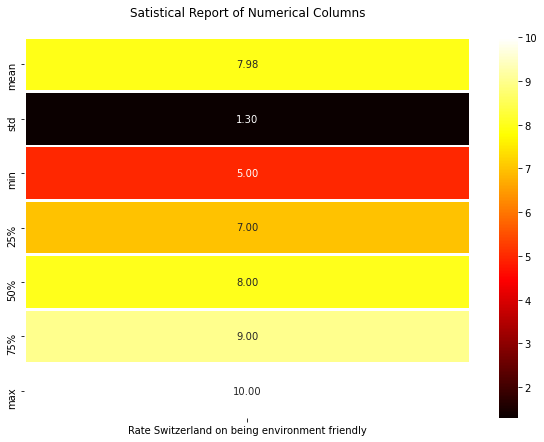

In [13]:
# visualizing the statistical description of numeric datatype column

plt.figure(figsize = (10,7))
sns.heatmap(round(df.describe()[1:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="hot")
plt.title("Satistical Report of Numerical Columns\n")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Right now in our entire dataframe we only have 1 column "Rate Switzerland on being environment friendly" as the sole numeric data column with integer type values.

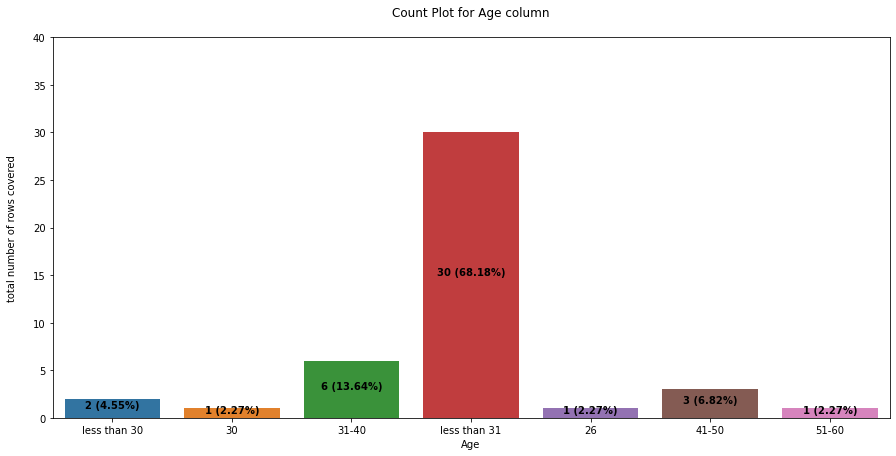

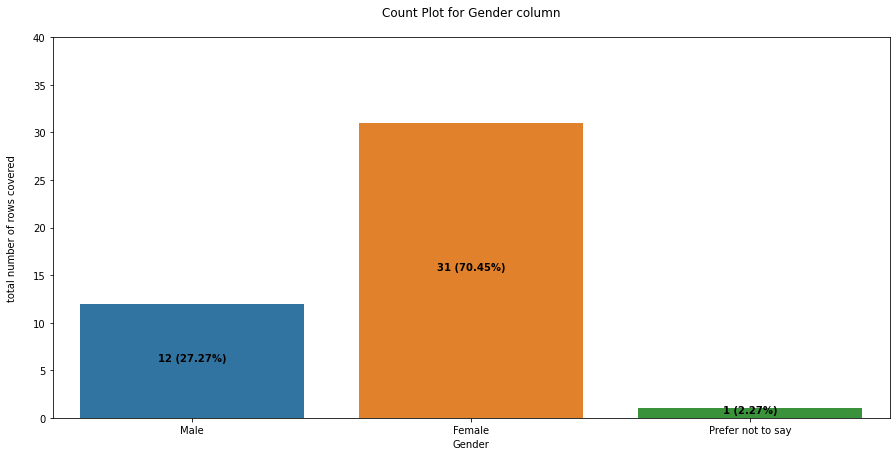

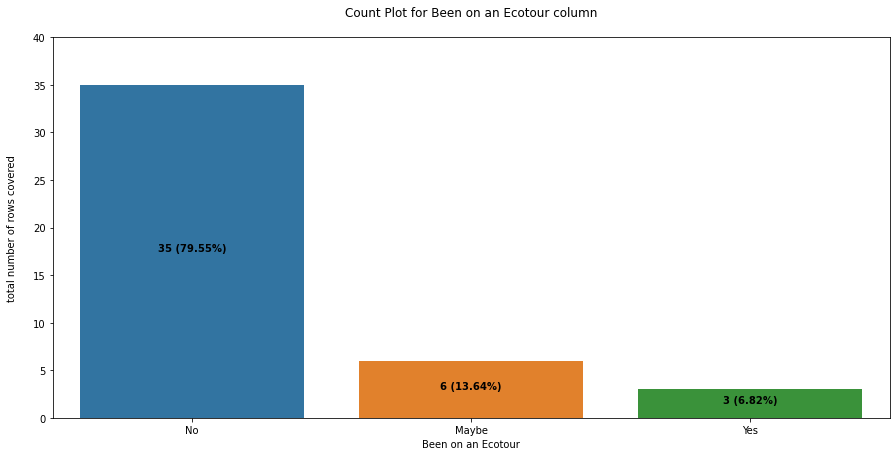

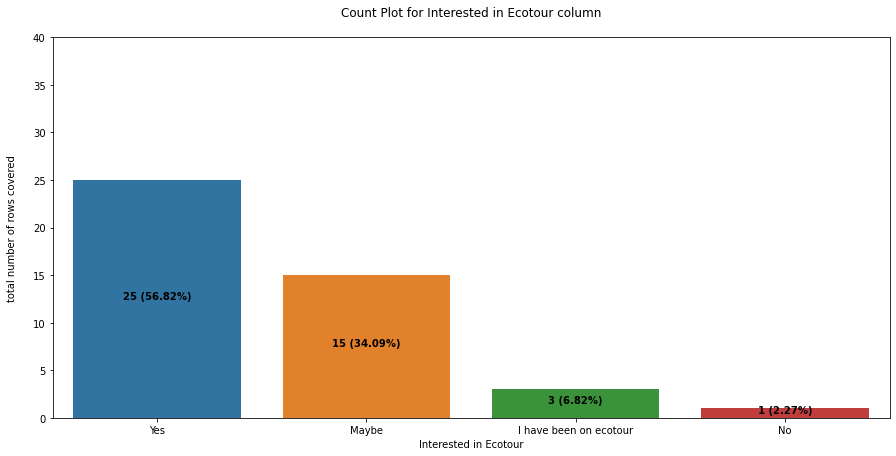

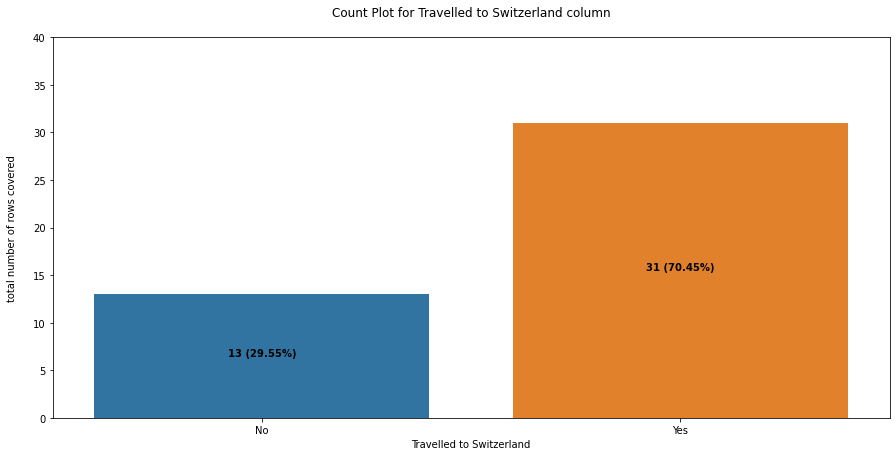

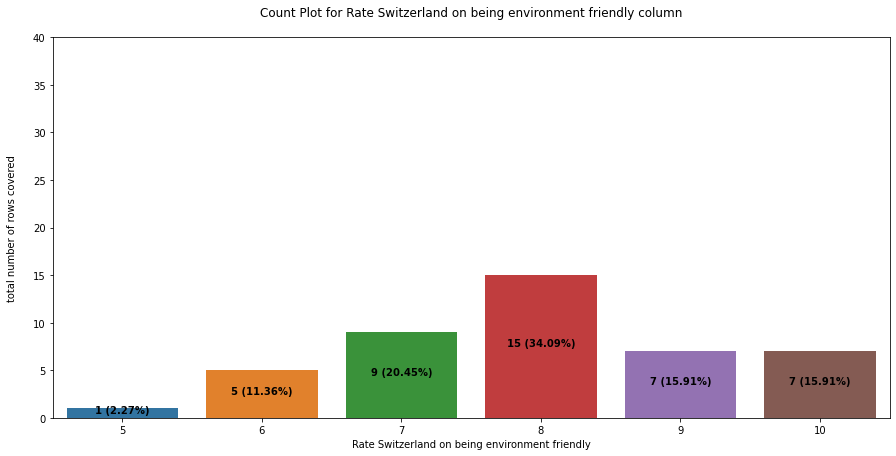

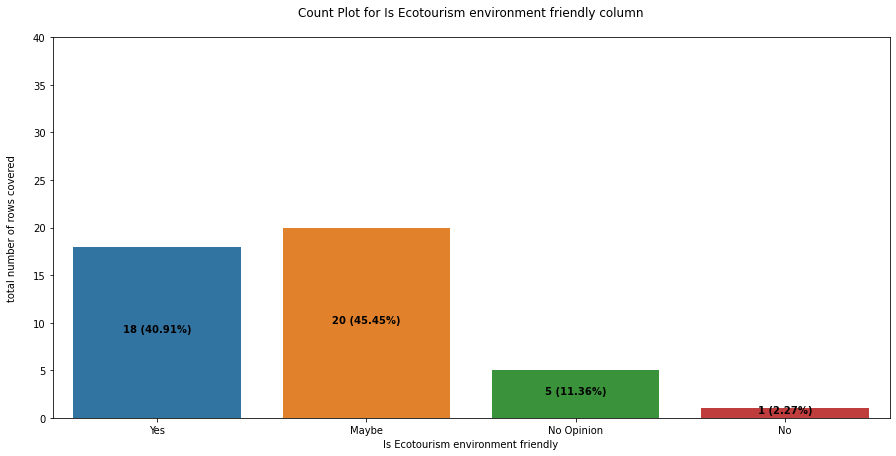

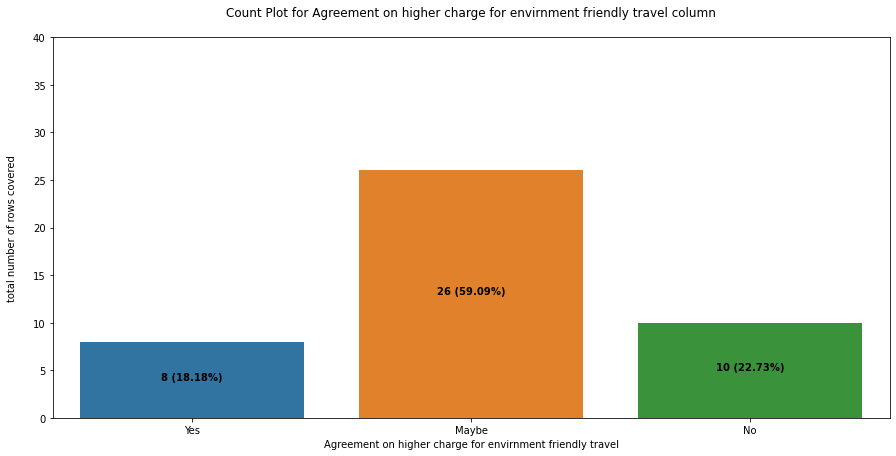

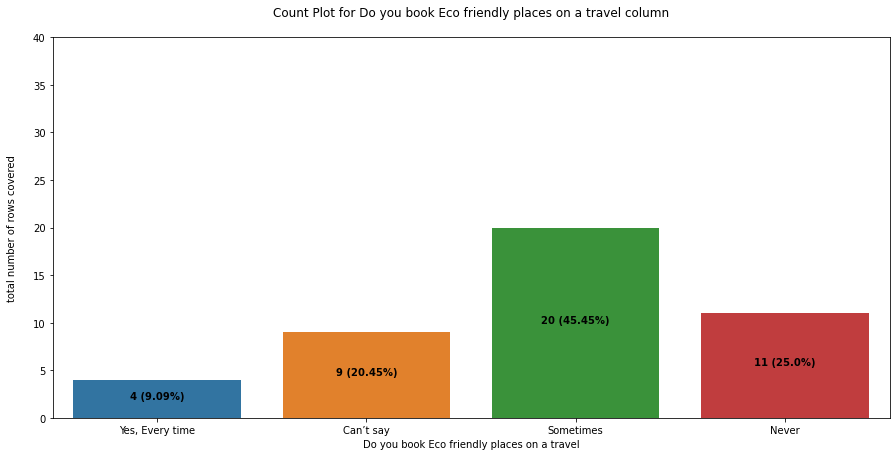

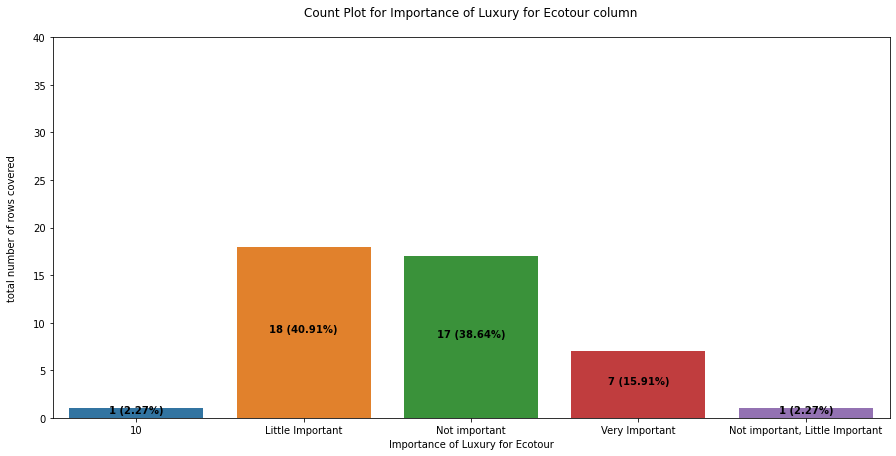

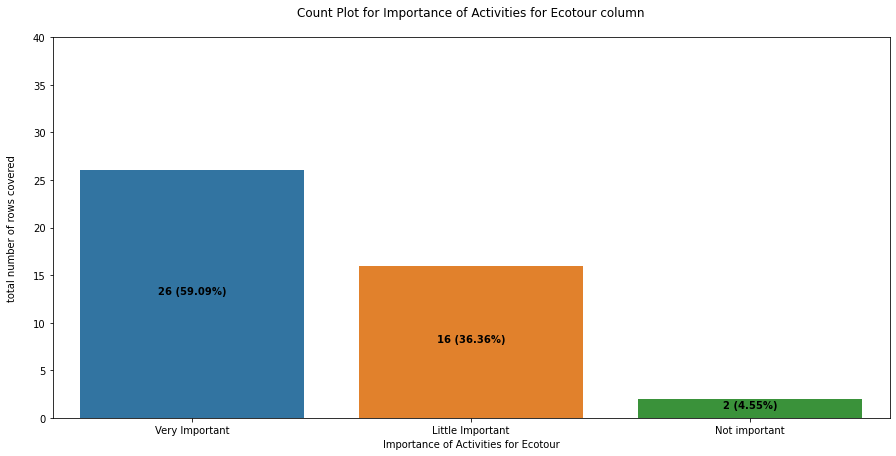

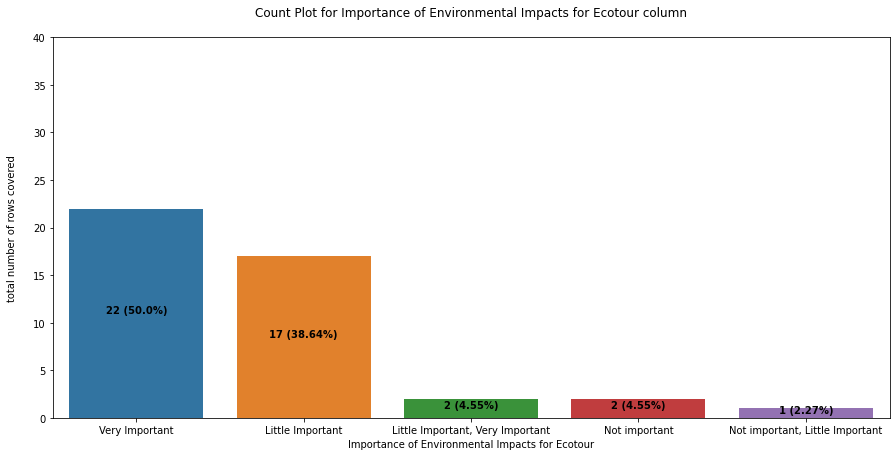

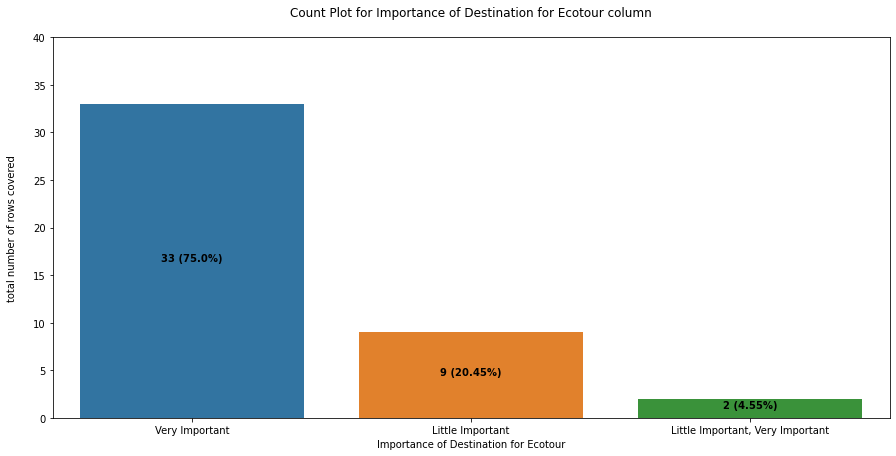

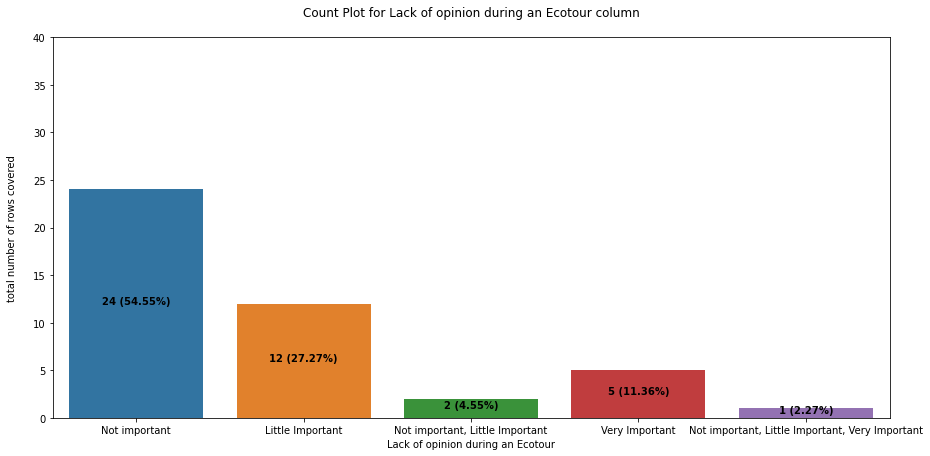

In [14]:
mini = ['Age', 'Gender', 'Been on an Ecotour', 'Interested in Ecotour', 'Travelled to Switzerland', 
       'Rate Switzerland on being environment friendly', 'Is Ecotourism environment friendly', 
       'Agreement on higher charge for envirnment friendly travel', 'Do you book Eco friendly places on a travel', 
       'Importance of Luxury for Ecotour', 'Importance of Activities for Ecotour', 
       'Importance of Environmental Impacts for Ecotour', 'Importance of Destination for Ecotour', 
       'Lack of opinion during an Ecotour']

for col in mini:
    try:
        x = col
        k=0
        plt.figure(figsize=[15,7])
        axes = sns.countplot(df[x])
        for i in axes.patches:
            ht = i.get_height()
            mr = len(df[x])
            st = f"{ht} ({round(ht*100/mr,2)}%)"
            plt.text(k, ht/2, st, ha='center', fontweight='bold')
            k += 1
        plt.ylim(0,40)
        plt.title(f'Count Plot for {x} column\n')
        plt.ylabel(f'total number of rows covered\n')
        plt.show()
    
    except Exception as e:
        print("Error:", e)
        pass

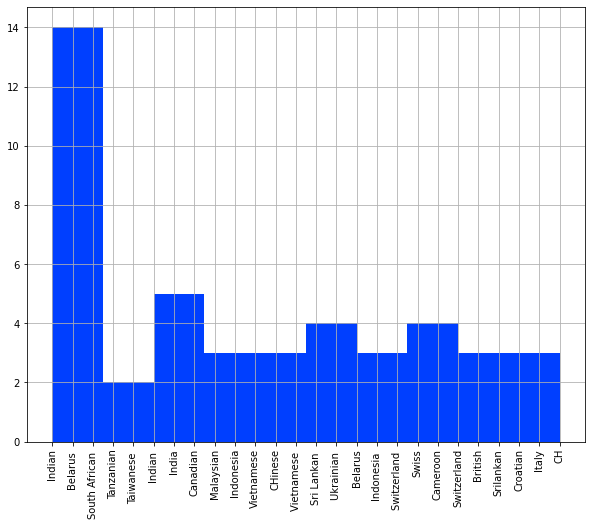

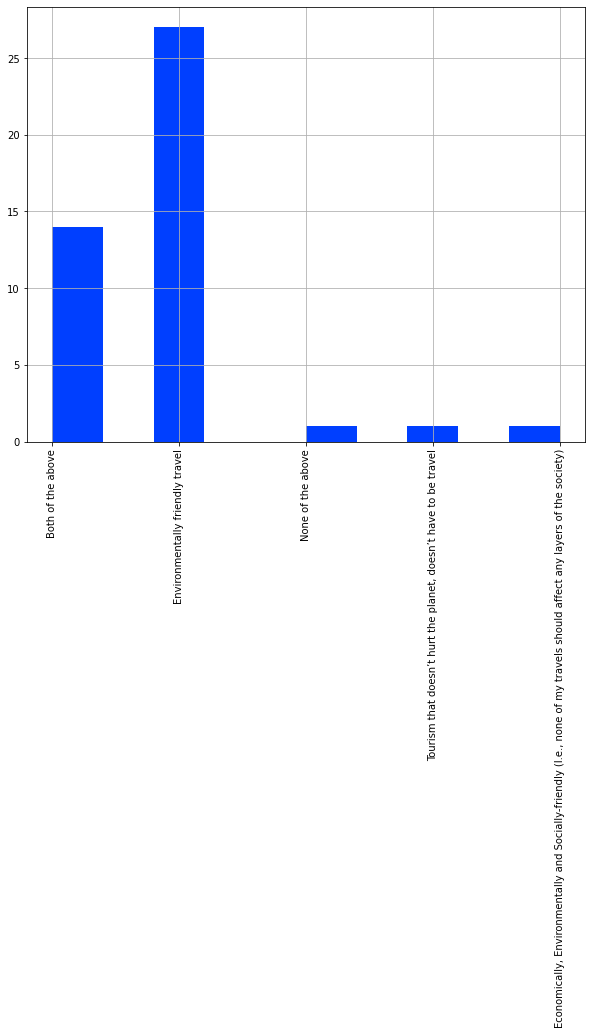

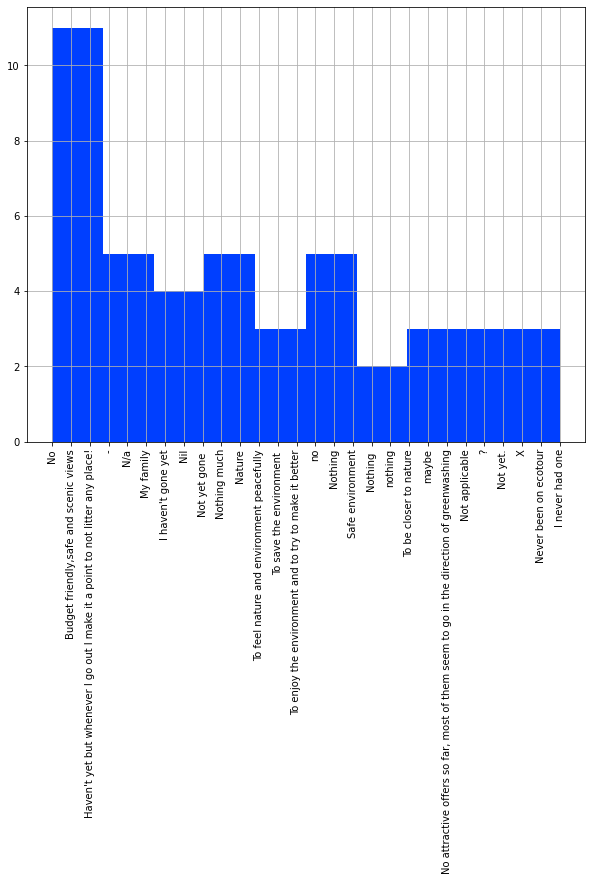

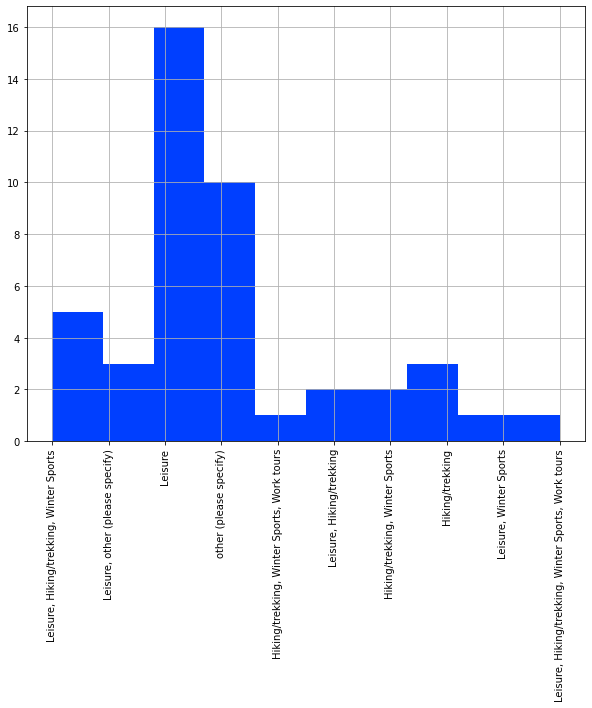

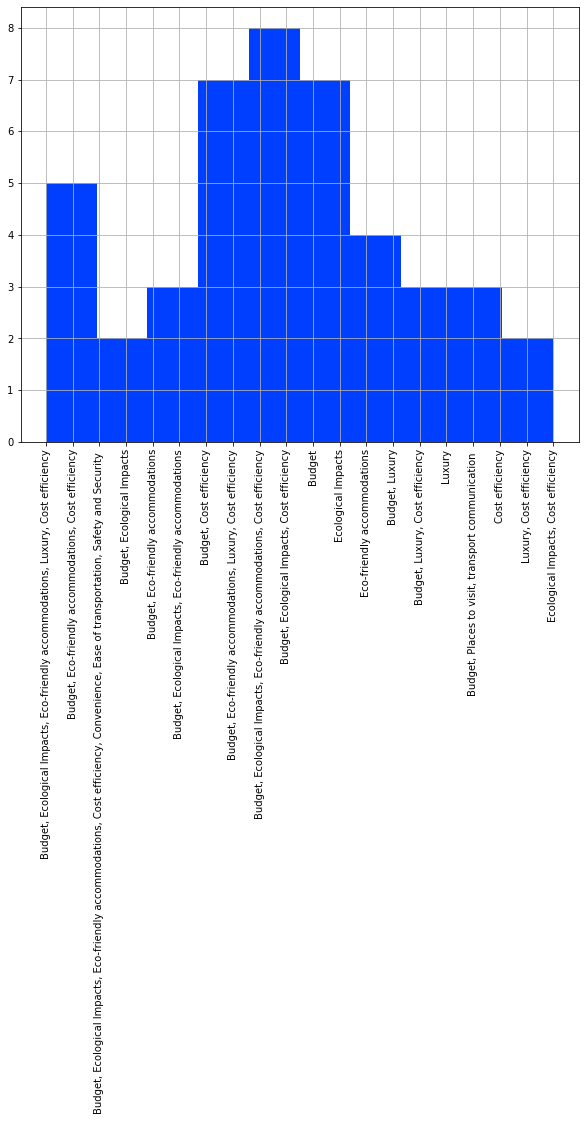

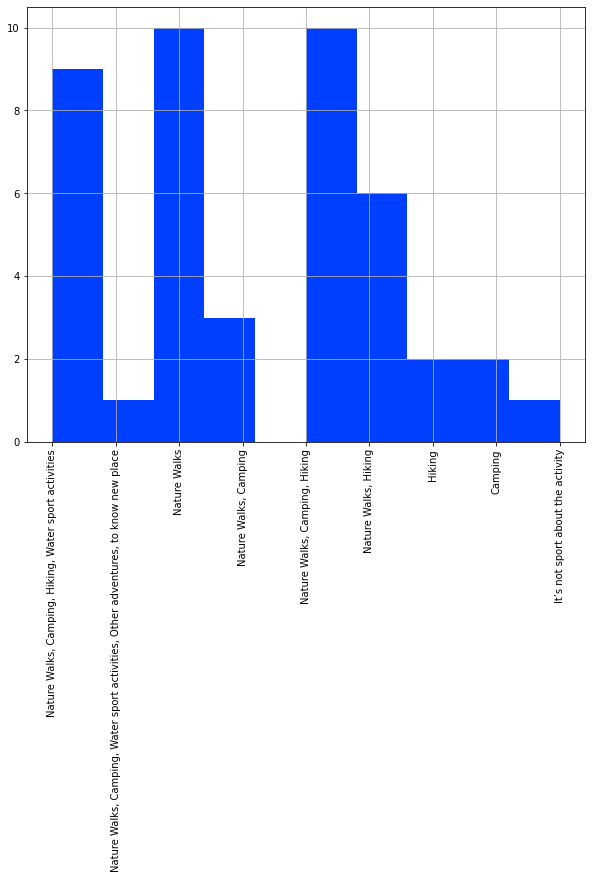

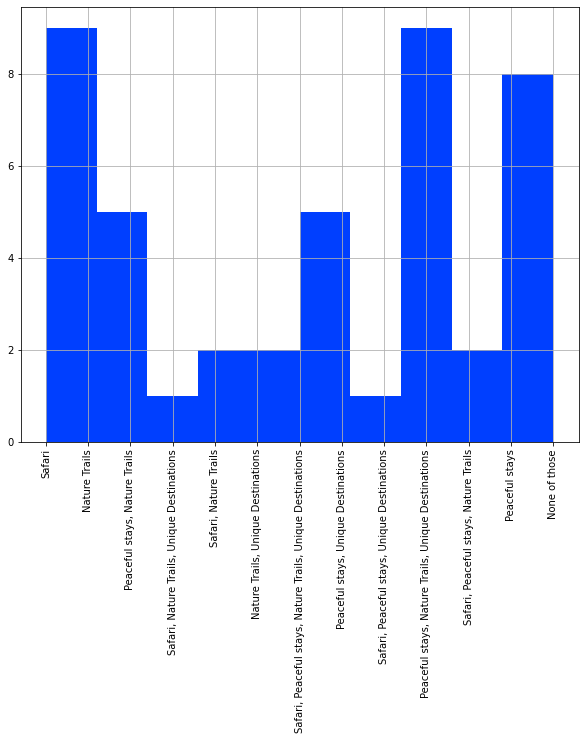

In [15]:
maxi = ['Nationality', 'Define Ecotourism', 'Motivation for Ecotour', 'Reason for travel to Switzerland', 
        'Things you consider planning a tour', 'Environment friendly tourism activities', 
        'Expectations from Eco friendly travel']

for col in maxi:
    plt.style.use('seaborn-bright')
    df[col].hist(figsize=(10,8)) # histogram creation code
    plt.xticks(rotation=90)
    plt.show()

Single digit category column name: Travelled to Switzerland


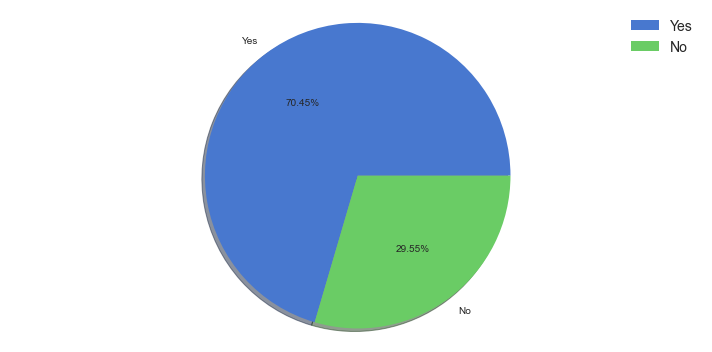

Single digit category column name: Gender


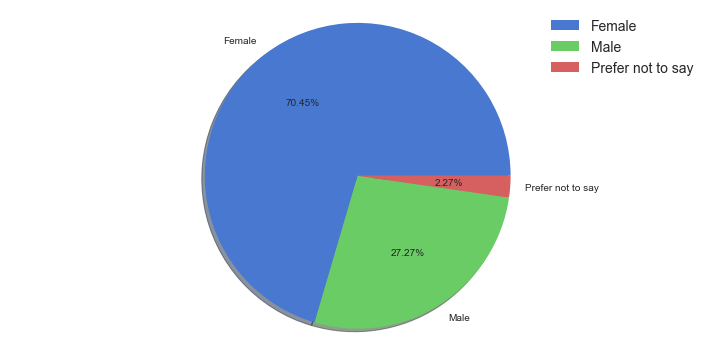

Single digit category column name: Been on an Ecotour


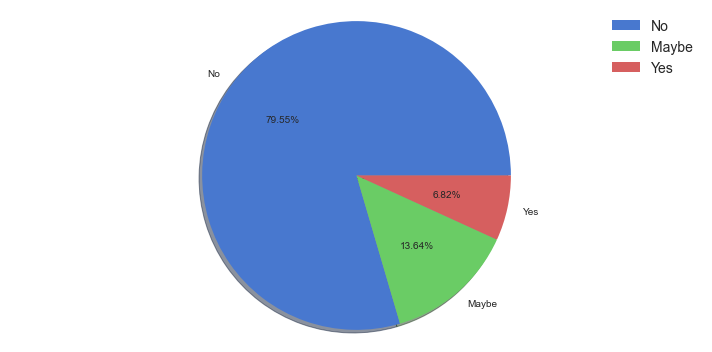

Single digit category column name: Importance of Activities for Ecotour


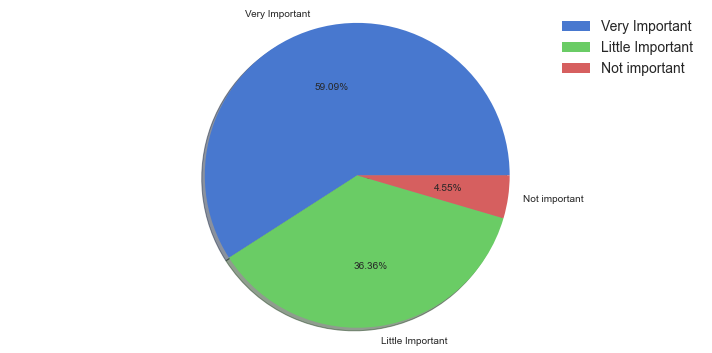

Single digit category column name: Importance of Destination for Ecotour


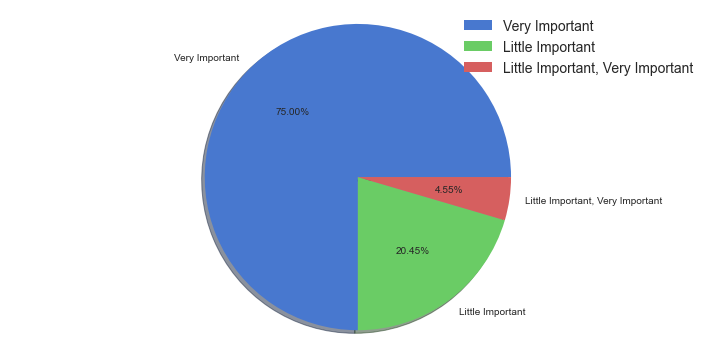

Single digit category column name: Agreement on higher charge for envirnment friendly travel


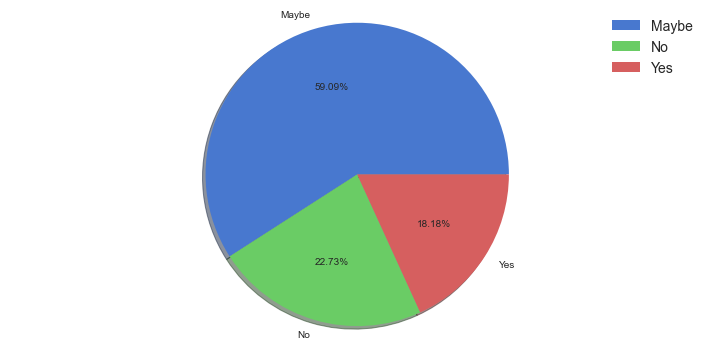

Single digit category column name: Interested in Ecotour


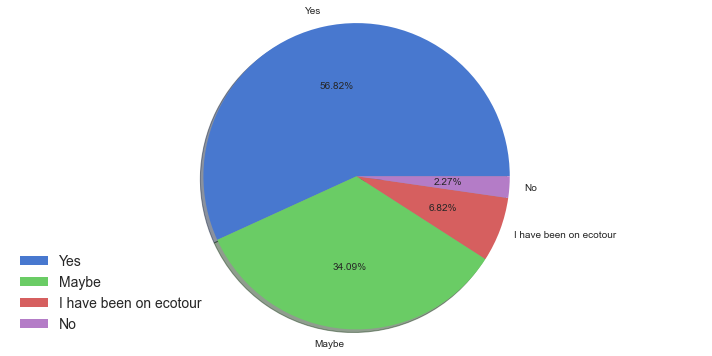

Single digit category column name: Is Ecotourism environment friendly


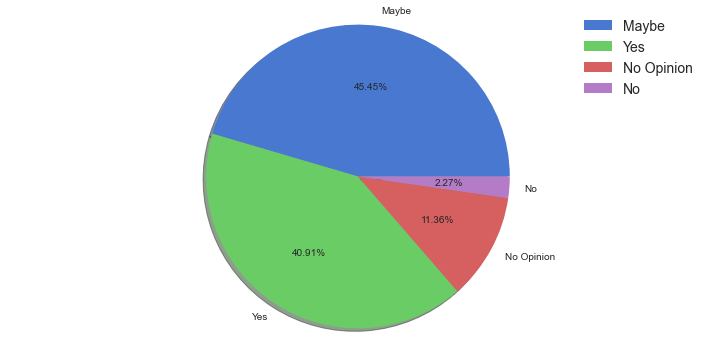

Single digit category column name: Do you book Eco friendly places on a travel


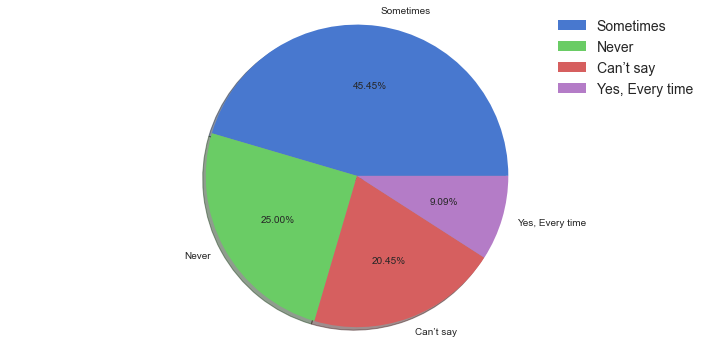

Single digit category column name: Lack of opinion during an Ecotour


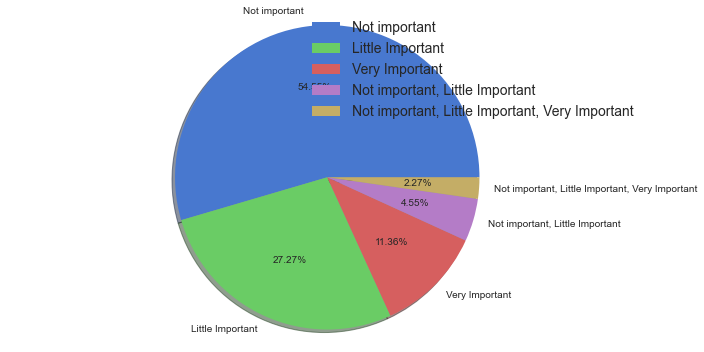

Single digit category column name: Importance of Environmental Impacts for Ecotour


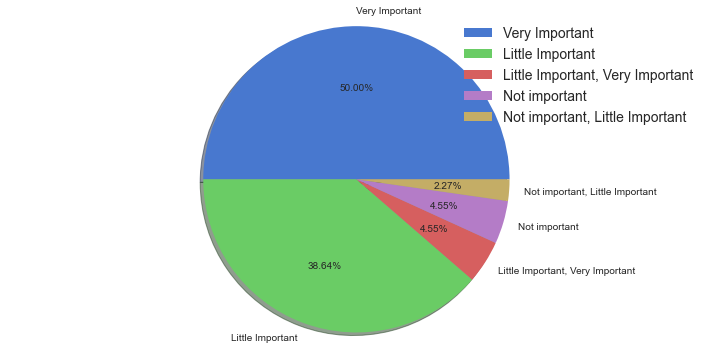

Single digit category column name: Environment friendly tourism activities


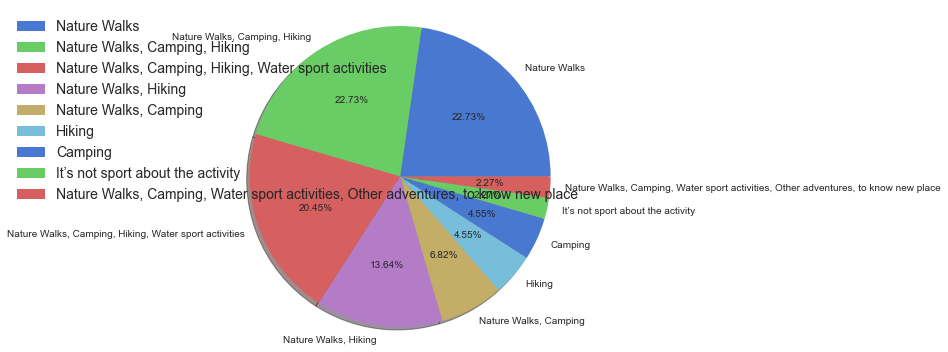

Single digit category column name: Importance of Luxury for Ecotour


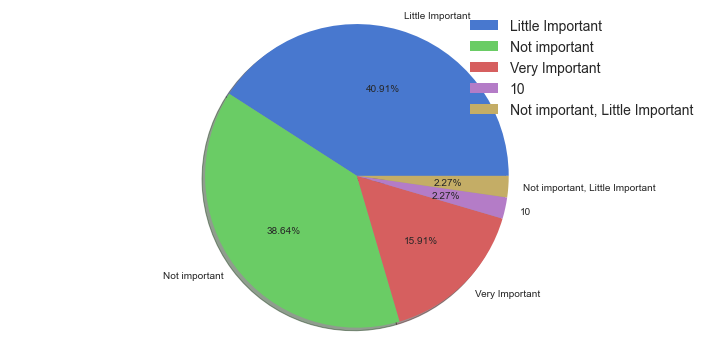

Single digit category column name: Rate Switzerland on being environment friendly


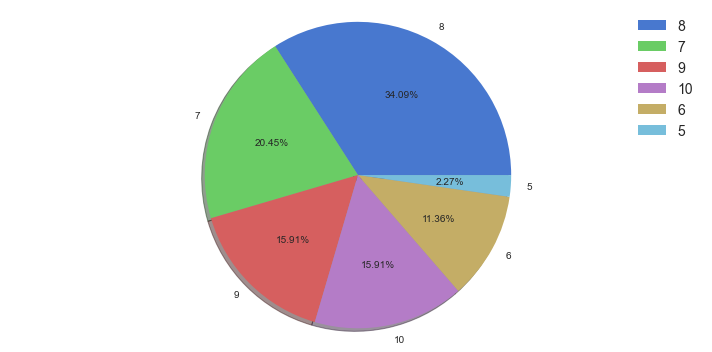

Single digit category column name: Age


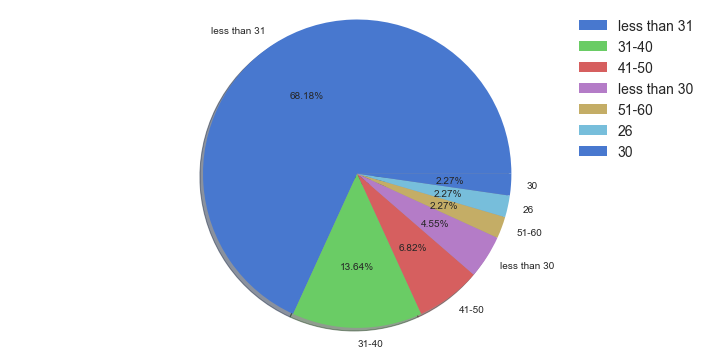

Single digit category column name: Reason for travel to Switzerland


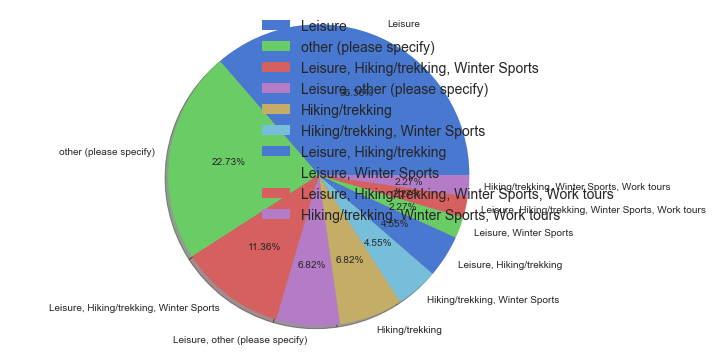

In [16]:
plt.style.use('seaborn-muted')
def generate_pie(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

pie_col = ["Travelled to Switzerland", "Gender", "Been on an Ecotour", "Importance of Activities for Ecotour", 
           "Importance of Destination for Ecotour", "Agreement on higher charge for envirnment friendly travel", 
           "Interested in Ecotour", "Is Ecotourism environment friendly", "Do you book Eco friendly places on a travel", 
           "Lack of opinion during an Ecotour", "Importance of Environmental Impacts for Ecotour", 
           "Environment friendly tourism activities", "Importance of Luxury for Ecotour", 
           "Rate Switzerland on being environment friendly", "Age", "Reason for travel to Switzerland"]

for i in df[pie_col]:
    print(f"Single digit category column name:", i)
    generate_pie(df[i])